In [12]:
#Importing the necessary libraries :)
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.datasets import make_moons, make_blobs
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

#here's a function to plot the clusters
def plot_clusters(X, labels, title):
    plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', edgecolor='k')
    plt.title(title)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.show()

#here's a function to generate the datasets
def generate_datasets():
    X_moons, _ = make_moons(n_samples=300, noise=0.05, random_state=42)
    X_blobs, _ = make_blobs(n_samples=300, centers=3, cluster_std=[1.0, 2.5, 0.5], random_state=42)
    return X_moons, X_blobs

#here's a function to apply clustering
def apply_clustering(X, eps=0.2, min_samples=5, n_clusters=3): #default values are for DBSCAN
    X_scaled = StandardScaler().fit_transform(X)
    # Apply the three different clustering algorithms
    kmeans = KMeans(n_clusters=n_clusters, random_state=42).fit(X_scaled)
    hier = AgglomerativeClustering(n_clusters=n_clusters).fit(X_scaled)
    dbscan = DBSCAN(eps=eps, min_samples=min_samples).fit(X_scaled)
    
    return kmeans.labels_, hier.labels_, dbscan.labels_

#getting the datasets
X_moons, X_blobs = generate_datasets()

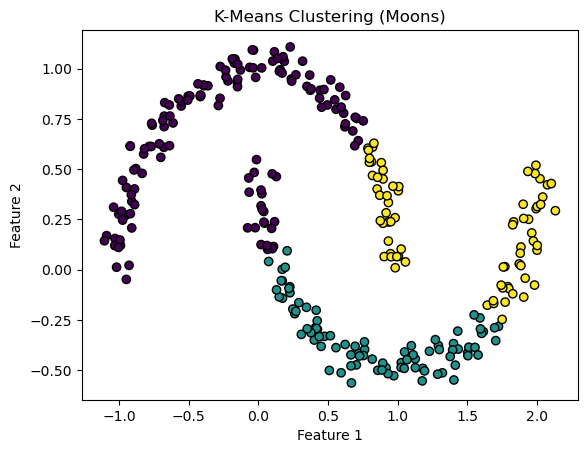

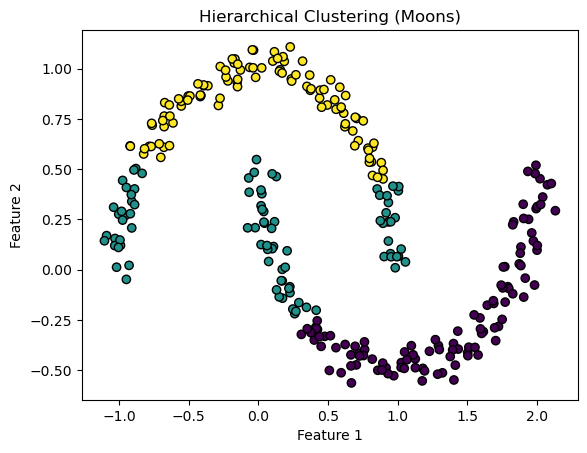

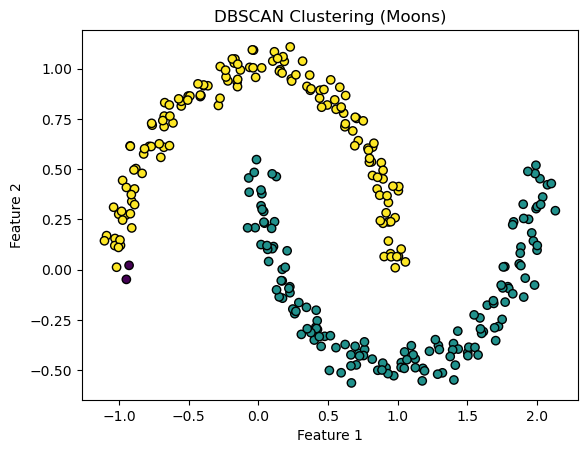

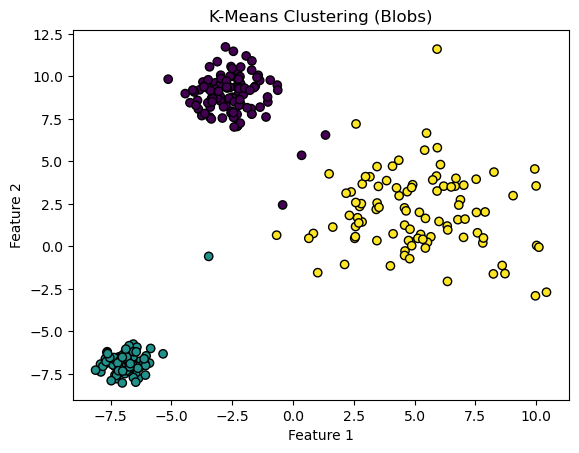

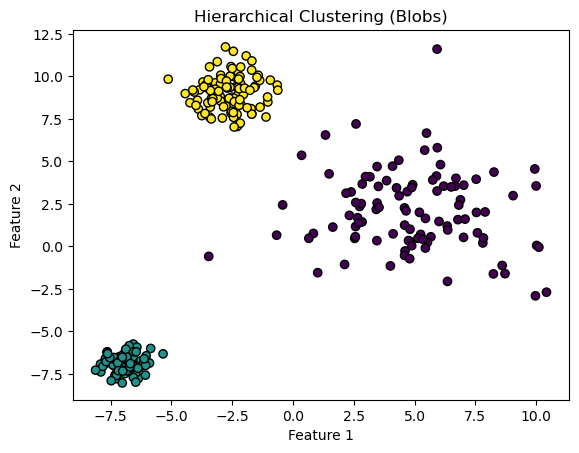

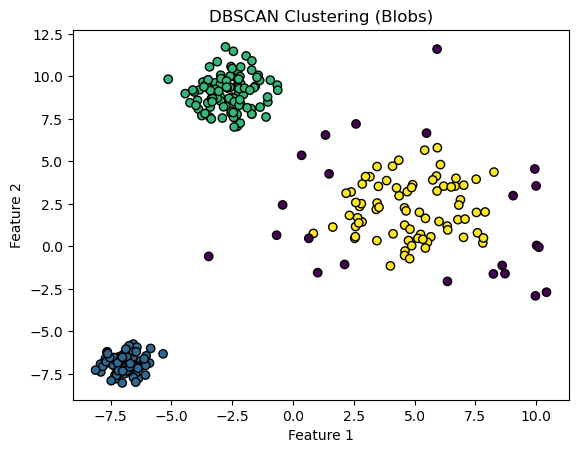

In [2]:
#clustering for moons dataset
labels_kmeans_moons, labels_hier_moons, labels_dbscan_moons = apply_clustering(X_moons)
plot_clusters(X_moons, labels_kmeans_moons, 'K-Means Clustering (Moons)')
plot_clusters(X_moons, labels_hier_moons, 'Hierarchical Clustering (Moons)')
plot_clusters(X_moons, labels_dbscan_moons, 'DBSCAN Clustering (Moons)')

#next is clustering for blobs dataset
labels_kmeans_blobs, labels_hier_blobs, labels_dbscan_blobs = apply_clustering(X_blobs)
plot_clusters(X_blobs, labels_kmeans_blobs, 'K-Means Clustering (Blobs)')
plot_clusters(X_blobs, labels_hier_blobs, 'Hierarchical Clustering (Blobs)')
plot_clusters(X_blobs, labels_dbscan_blobs, 'DBSCAN Clustering (Blobs)')